# Název

## Setup

In [1]:
from protokol import *

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (4*1.5,2.5*1.5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]
plt.rcParams["text.latex.preamble"] = r"""
\usepackage[decimalsymbol=comma]{siunitx}
"""

In [3]:
def relative(self):
    return self.s / self.n

uncertainties.core.Variable.rel = relative

## Přístroje

báze: voltmetr, ampermetr: METEX MXD-4660A

kolektor: voltmetr, ampermetr: KEITHLEY 2100

In [74]:
def keithley_U_err(val):
    if val < 100e-3:
        err = val * 5.5e-5 + 100e-3 * 4e-5
    elif val < 1:
        err = val * 4.5e-5 + 1   * 0.8e-5
    elif val < 10:
        err = val * 3.8e-5 + 10  * 0.6e-5
    elif val < 100:
        err = val * 5e-5   + 100 * 0.7e-5
    return uf(val, err)

In [75]:
def keithley_I_err(val):
    if val < 10e-3:
        err = val * 55e-5 + 10e-3 * 25e-5
    elif val < 100e-3:
        err = val * 55e-5 + 100e-3 * 6e-5
    return uf(val, err)

In [76]:
def metex_U_err(val):
    if val < 200e-3:
        err = val * 5e-4 + 10e-6 * 3
    elif val < 2:
        err = val * 5e-4 + 100e-6 * 3
    elif val < 20:
        err = val * 5e-4 + 1e-3  * 3
    return uf(val, err)

In [77]:
def metex_I_err(val):
    if val < 2e-3:
        err = val * 3e-3 + 100e-9 * 3
    elif val < 20e-3:
        err = val * 3e-3 + 1e-6 * 3
    elif val < 200e-3:
        err = val * 3e-3 + 10e-6 * 3
    return uf(val, err)

## Úkol 1

In [78]:
u1_1000 = pd.read_csv("../raw/u1_1000.txt", sep="\s+,\s+")
u1_1000.I_BE *= 1e-3

u1_1000.U_BE = u1_1000.U_BE.apply(keithley_U_err)
u1_1000.I_BE = u1_1000.I_BE.apply(keithley_I_err)
u1_1000.head()

c:\tools\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,U_BE,I_BE
0,0.543800+/-0.000032,(0.9+/-2.5)e-06
1,0.585700+/-0.000034,(3.6+/-2.5)e-06
2,0.61610+/-0.00004,(8.22+/-0.25)e-05
3,0.63100+/-0.00004,0.0002220+/-0.0000026
4,0.66460+/-0.00004,0.0008176+/-0.0000029


In [79]:
u1_inf = pd.read_csv("../raw/u1_inf.txt", sep="\s+,\s+")
u1_inf.I_BE *= 1e-3

u1_inf.U_BE = u1_inf.U_BE.apply(keithley_U_err)
u1_inf.I_BE = u1_inf.I_BE.apply(keithley_I_err)
u1_inf.head()

c:\tools\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,U_BE,I_BE
0,0.376600+/-0.000025,(0.3+/-2.5)e-06
1,0.502700+/-0.000031,(4.30+/-0.25)e-05
2,0.559000+/-0.000033,(3.26+/-0.25)e-05
3,0.608600+/-0.000035,0.0001690+/-0.0000026
4,0.61990+/-0.00004,0.0002410+/-0.0000026


### Grafy

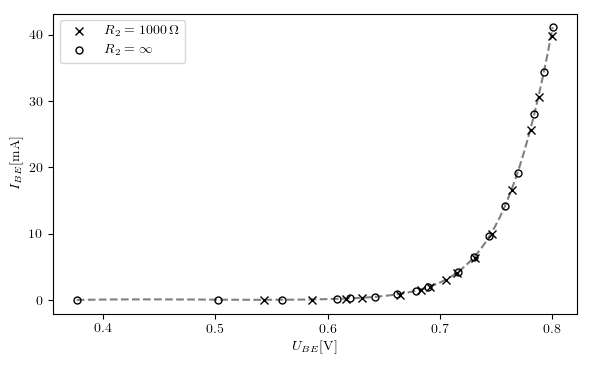

In [80]:
fig = plt.figure()
ax = plt.axes()

px1 = noms(u1_1000.U_BE)
py1 = noms(u1_1000.I_BE) * 1e3

px2 = noms(u1_inf.U_BE)
py2 = noms(u1_inf.I_BE) * 1e3
fit = Spline(px2, py2, s=0)

ax.plot(*fit.curve(), "--", c="gray")

ax.plot(px1, py1, "kx", label="$R_2 = \SI{1000}{\ohm}$")
ax.plot(px2, py2, "ko", ms=5, mfc="none", label="$R_2 = \infty$")

ax.set_xlabel(r"$U_{BE}[\si{\volt}]$")
ax.set_ylabel(r"$I_{BE}[\si{\milli\ampere}]$")
ax.legend()

plt.tight_layout()
plt.savefig("../plot/u1.pdf")

## Úkol 2

In [81]:
u2_01 = pd.read_csv("../raw/u2_0.1.txt", sep="\s+,\s+")
u2_01.I_CE *= 1e-3

u2_01.U_CE = u2_01.U_CE.apply(metex_U_err)
u2_01.I_CE = u2_01.I_CE.apply(metex_I_err)
u2_01.head()

c:\tools\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,U_CE,I_CE
0,0.01414+/-0.00004,0.0002380+/-0.0000010
1,0.05064+/-0.00006,0.002139+/-0.000009
2,0.07092+/-0.00007,0.004041+/-0.000015
3,0.10184+/-0.00008,0.007615+/-0.000026
4,0.11958+/-0.00009,0.009511+/-0.000032


In [82]:
u2_02 = pd.read_csv("../raw/u2_0.2.txt", sep="\s+,\s+")
u2_02.I_CE *= 1e-3

u2_02.U_CE = u2_02.U_CE.apply(metex_U_err)
u2_02.I_CE = u2_02.I_CE.apply(metex_I_err)
u2_02.head()

c:\tools\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,U_CE,I_CE
0,0.010113+/-0.000035,0.0003106+/-0.0000012
1,0.02127+/-0.00004,0.0010830+/-0.0000035
2,0.03087+/-0.00005,0.001975+/-0.000006
3,0.04686+/-0.00005,0.004009+/-0.000015
4,0.05997+/-0.00006,0.006204+/-0.000022


In [83]:
u2_03 = pd.read_csv("../raw/u2_0.3.txt", sep="\s+,\s+")
u2_03.I_CE *= 1e-3

u2_03.U_CE = u2_03.U_CE.apply(metex_U_err)
u2_03.I_CE = u2_03.I_CE.apply(metex_I_err)
u2_03.head()

c:\tools\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,U_CE,I_CE
0,0.009514+/-0.000035,0.0004640+/-0.0000017
1,0.01236+/-0.00004,0.0007370+/-0.0000025
2,0.01571+/-0.00004,0.001086+/-0.000004
3,0.02411+/-0.00004,0.002119+/-0.000009
4,0.03153+/-0.00005,0.003240+/-0.000013


### Grafy

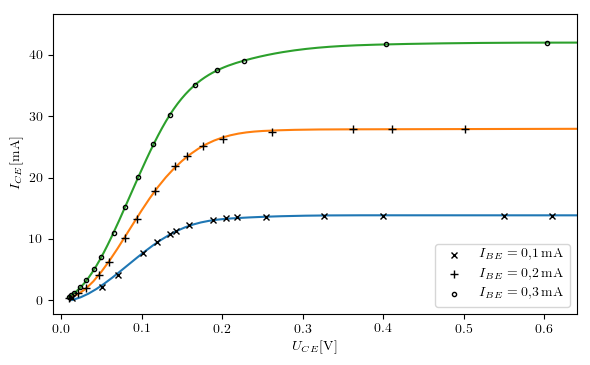

In [84]:
fig = plt.figure()
ax = plt.axes()

px1 = noms(u2_01.U_CE)
py1 = noms(u2_01.I_CE) * 1e3

spl1 = Spline(px1, py1)
spl1.set_smoothing_factor(0.4)

px2 = noms(u2_02.U_CE)
py2 = noms(u2_02.I_CE) * 1e3

spl2 = Spline(px2, py2)
spl2.set_smoothing_factor(0.4)

px3 = noms(u2_03.U_CE)
py3 = noms(u2_03.I_CE) * 1e3

spl3 = Spline(px3[:18], py3[:18])
spl3.set_smoothing_factor(0.05)

ax.plot(*spl1.curve(res=1000))
ax.plot(*spl2.curve(res=1000))
ax.plot(*spl3.curve(res=200))
ax.plot(px1, py1, "kx", ms=5, label="$I_{BE} = \SI{0.1}{mA}$")
ax.plot(px2, py2, "k+", ms=6, label="$I_{BE} = \SI{0.2}{mA}$")
ax.plot(px3, py3, "ko", ms=3, mfc="none", label="$I_{BE} = \SI{0.3}{mA}$")

ax.set_xlabel(r"$U_{CE}[\si{\volt}]$")
ax.set_xbound(-0.01,0.64)
ax.set_ylabel(r"$I_{CE}[\si{\milli\ampere}]$")
ax.legend(loc=4)

plt.tight_layout()
plt.savefig("../plot/u2.pdf")

## Úkol 3

In [85]:
u3_2V = pd.read_csv("../raw/u3_2V.txt", sep="\s+,\s+")
u3_2V *= 1e-3

u3_2V.I_BE = u3_2V.I_BE.apply(keithley_I_err)
u3_2V.I_CE = u3_2V.I_CE.apply(metex_I_err)
u3_2V

c:\tools\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,I_BE,I_CE
0,(4.96+/-0.25)e-05,0.007010+/-0.000024
1,(9.60+/-0.26)e-05,0.01353+/-0.00004
2,0.0001600+/-0.0000026,0.02250+/-0.00010
3,0.0002154+/-0.0000026,0.02990+/-0.00012
4,0.0002479+/-0.0000026,0.03410+/-0.00013
5,0.0003007+/-0.0000027,0.04091+/-0.00015


In [88]:
u3_6V = pd.read_csv("../raw/u3_6V.txt", sep="\s+,\s+")
u3_6V *= 1e-3

u3_6V.I_BE = u3_6V.I_BE.apply(keithley_I_err)
u3_6V.I_CE = u3_6V.I_CE.apply(metex_I_err)
u3_6V.head()

c:\tools\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,I_BE,I_CE
0,(5.04+/-0.25)e-05,0.007194+/-0.000025
1,0.0001062+/-0.0000026,0.01522+/-0.00005
2,0.0001505+/-0.0000026,0.02150+/-0.00009
3,0.0002048+/-0.0000026,0.02912+/-0.00012
4,0.0002534+/-0.0000026,0.03584+/-0.00014


In [89]:
u3_10V = pd.read_csv("../raw/u3_10V.txt", sep="\s+,\s+")
u3_10V *= 1e-3

u3_10V.I_BE = u3_10V.I_BE.apply(keithley_I_err)
u3_10V.I_CE = u3_10V.I_CE.apply(metex_I_err)
u3_10V.head()

c:\tools\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,I_BE,I_CE
0,(5.24+/-0.25)e-05,0.007560+/-0.000026
1,0.0001003+/-0.0000026,0.01455+/-0.00005
2,0.0001509+/-0.0000026,0.02187+/-0.00010
3,0.0001975+/-0.0000026,0.02856+/-0.00012
4,0.0002495+/-0.0000026,0.03601+/-0.00014


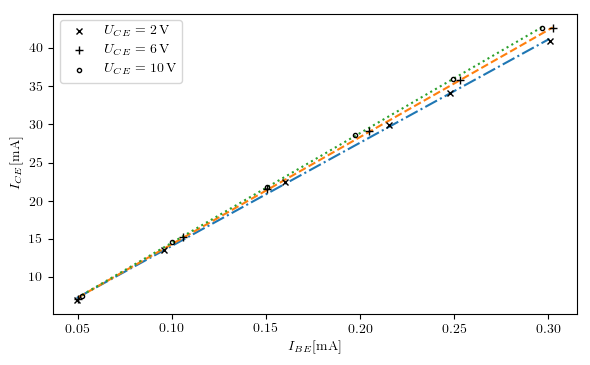

In [92]:
fig = plt.figure()
ax = plt.axes()

px1 = noms(u3_2V.I_BE) * 1e3
py1 = noms(u3_2V.I_CE) * 1e3

px2 = noms(u3_6V.I_BE) * 1e3
py2 = noms(u3_6V.I_CE) * 1e3

px3 = noms(u3_10V.I_BE) * 1e3
py3 = noms(u3_10V.I_CE) * 1e3

fit1 = FitCurve(f_line, px1, py1)
fit2 = FitCurve(f_line, px2, py2)
fit3 = FitCurve(f_line, px3, py3)

beta_2V = fit1.params[0]
beta_6V = fit2.params[0]
beta_10V = fit3.params[0]

ax.plot(*fit1.curve(), "-.")
ax.plot(*fit2.curve(), "--")
ax.plot(*fit3.curve(), ":")

ax.plot(px1, py1, "kx", ms=5, label="$U_{CE} = \SI{2}{V}$")
ax.plot(px2, py2, "k+", ms=6, label="$U_{CE} = \SI{6}{V}$")
ax.plot(px3, py3, "ko", ms=3, mfc="none", label="$U_{CE} = \SI{10}{V}$")

ax.set_xlabel("$I_{BE} [\si{mA}]$")
ax.set_ylabel("$I_{CE} [\si{mA}]$")
ax.legend()

plt.tight_layout()
plt.savefig("../plot/u3.pdf")

In [35]:
print(f"{beta_10V:L}")

143.7 \pm 0.4


In [93]:
def latex_table(df):
    col_names = list(df.columns)
    cols = {}
    
    for c in list(df.columns):
        err = stds(df[c])
        if sp.count_nonzero(err) > 0: 
            cols[c] = []
            cols[f"s_{c}"] = []
            for v in df[c]:
                nom_cast, err_cast = "{:1}".format(v).split("+/-")
                cols[c].append(nom_cast)
                cols[f"s_{c}"].append(err_cast)
        else:
            cols[c] = list(df[c])
    for name, data in cols.items():
        longest = len(name)
        for val in data:
            if len(str(val)) > longest:
                longest = len(str(val))
        cols[name] = list(map(lambda h: str(h).ljust(longest + 1), data))
    
    cols_list = []
    for i in range(len(col_names)):
        cols_list.append([col_names[0]] + cols[col_names[0]])
        try:
            cols_list.append([f"s_{col_names[0]}"] + cols[f"s_{col_names[0]}"])
        except KeyError:
            pass
        col_names.pop(0)
    
    for i in cols_list:
        i[0] = i[0].ljust(len(i[1]))
    
    rows_list = list(map(list, zip(*cols_list)))
    
    rows = ["& ".join(r) for r in rows_list]
    
    out = "\\\\ \n".join(rows) + "\\\\"
    
    return out

In [112]:
for g, h in zip(u3_10V.I_BE * 1e3, u3_10V.I_CE * 1e3):
    print(f"{g:.1u} & {h:.1u} \\\\".replace("+/-", " & "))


0.052 & 0.003 & 7.56 & 0.03 \\
0.100 & 0.003 & 14.55 & 0.05 \\
0.151 & 0.003 & 21.9 & 0.1 \\
0.198 & 0.003 & 28.6 & 0.1 \\
0.249 & 0.003 & 36.0 & 0.1 \\
0.297 & 0.003 & 42.6 & 0.2 \\
